# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import clear_output

!pip3 install pyprind

clear_output()

# Instructions

* Clone the notebook to your drive.
* The notebook has to be submitted in the form of a link giving us **view access**. Share this link in your application.

* If you still have any queries, you can reach out to the [core team](https://www.notion.so/Club-Contacts-70a4823e0ae34f35a0aa5d479e449915)



# Common Technical Questionnaire


### Question 1

Supervised learning is a type of machine learning where the inputs and outputs are mapped through
a family of equations, the machine learning model essentially picks the right curve to fit the data.
Quantile Regression is a type of supervised learning technique used in statistics and economics. One
advantage of quantile regression relative to ordinary least squares regression is that the quantile
regression estimates are more robust against outliers in the response measurements.

QuantileLossτ (y, ˆy) =
{

                           τ · (y − ˆy) if y > ˆy

                          (1 − τ ) · (ˆy − y) if y ≤ ˆy
}

where τ is Quantile whose value lies between 0 and 1.
Please use this template provided and make changes accordingly for this question alone.
Implement a simple Neural Network consisting of 4 nodes, one hidden layer consisting of 5 nodes
and output layer consisting of two nodes. Perform quantile regression on the model and observe
the loss.
**Bonus: Play around with the value of τ to find what value achieves convergence quicker.**



An example implementation of a simple manual neural network is provided. You may use this as inspiration to complete the task at hand.

In [ ]:
# Imports
import torch

In [ ]:
# Defining the quantile value for regression
quantile = 0.5

# Setting seed for reproducibility
torch.manual_seed(42)

# Initialising Parameters and Variables
x = torch.rand((2, 4), requires_grad=False)
y = torch.rand((2, 2), requires_grad=False)

# Weights and Biases connecting input and hidden layer
a0 = torch.rand((4, 5), requires_grad=True)
b0 = torch.rand((1, 5), requires_grad=True)

# Weights and Biases connecting hidden and output layer
a1 = torch.rand((5, 2), requires_grad=True)
b1 = torch.rand((1, 2), requires_grad=True)

# Forward Propagation 1
y_1 = x@a0 + b0
y_pred1 = y_1@a1 + b1

# Defining quantile loss function
def loss_function(output, target):
  global quantile
  error = output - target
  loss = torch.max((quantile - 1) * error, quantile * error)
  return torch.abs(loss).mean()

# Computation of loss
loss = loss_function(y_pred1, y)
print(loss.item())

# Back Propagation 1
loss.backward()

# Gradient update
with torch.no_grad():
    a0 = a0 - 0.01*a0.grad
    b0 = b0 - 0.01*b0.grad
    a1 = a1 - 0.01*a1.grad
    b1 = b1 - 0.01*b1.grad

# Setting requires_grad to True again as it was modified
a0.requires_grad = True
a1.requires_grad = True
b0.requires_grad = True
b1.requires_grad = True

# Forward Propagation 2
y_2 = x@a0 + b0
y_pred2= y_2@a1 + b1

# Computation of Loss
loss = loss_function(y_pred2, y)
print(loss.item())

# Back Propagation 2
loss.backward()

# Gradient Update
with torch.no_grad():
    a0 = a0 - 0.01*a0.grad
    b0 = b0 - 0.01*b0.grad
    a1 = a1 - 0.01*a1.grad
    b1 = b1 - 0.01*b1.grad

# Setting requires_grad to True again as it was modified
a0.requires_grad = True
a1.requires_grad = True
b0.requires_grad = True
b1.requires_grad = True

# Forward Propagation 2
y_3 =  x@a0 + b0
y_pred3= y_3@a1 + b1

# Computation of Loss
loss = loss_function(y_pred3, y)
print(loss.item())

3.0106849670410156
2.9726624488830566
2.935065269470215


# Convergence Test
From the experiment performed below quantile value of 0.5 converges faster.

Quantile value taken:  0.1

Number of epochs taken to converge:  7677

Quantile value taken:  0.2

Number of epochs taken to converge:  3813

Quantile value taken:  0.3

Number of epochs taken to converge:  2538

Quantile value taken:  0.4

Number of epochs taken to converge:  1879

Quantile value taken:  0.5

Number of epochs taken to converge:  1780

Quantile value taken:  0.6

Number of epochs taken to converge:  2162

Quantile value taken:  0.7

Number of epochs taken to converge:  2814

Quantile value taken:  0.8

Number of epochs taken to converge:  4185

Quantile value taken:  0.9

Number of epochs taken to converge:  8282

In [ ]:
import math
import numpy as np

epoch_list = []
quantile_list = []

for i in range(9):
  # Defining the quantile value for regression
  quantile = 0.1*(i+1)
  quantile_list.append(quantile)

  # Setting seed for reproducibility
  torch.manual_seed(42)

  # Initialising Parameters and Variables
  x = torch.rand((2, 4), requires_grad=False)
  y = torch.rand((2, 2), requires_grad=False)

  # Weights and Biases connecting input and hidden layer
  a0 = torch.rand((4, 5), requires_grad=True)
  b0 = torch.rand((1, 5), requires_grad=True)

  # Weights and Biases connecting hidden and output layer
  a1 = torch.rand((5, 2), requires_grad=True)
  b1 = torch.rand((1, 2), requires_grad=True)

  loss = math.inf
  epochs = 0
  y_predt = torch.zeros((2, 2))

  while not torch.allclose(y, y_predt, atol=1e-1):
    # Forward Propagation
    y_t = x@a0 + b0
    y_predt = y_t@a1 + b1

    # Computation of loss
    loss = loss_function(y_predt, y)
    # print(loss.item())

    # Back Propagation
    loss.backward()

    # Gradient update
    with torch.no_grad():
        a0 = a0 - 0.01*a0.grad
        b0 = b0 - 0.01*b0.grad
        a1 = a1 - 0.01*a1.grad
        b1 = b1 - 0.01*b1.grad

    # Setting requires_grad to True again as it was modified
    a0.requires_grad = True
    a1.requires_grad = True
    b0.requires_grad = True
    b1.requires_grad = True

    epochs += 1

  epoch_list.append(epochs)
  print("Quantile value taken: ", round(quantile, 1))
  print("Number of epochs taken to converge: ", epochs)
  print()

Quantile value taken:  0.1
Number of epochs taken to converge:  7677

Quantile value taken:  0.2
Number of epochs taken to converge:  3813

Quantile value taken:  0.3
Number of epochs taken to converge:  2538

Quantile value taken:  0.4
Number of epochs taken to converge:  1879

Quantile value taken:  0.5
Number of epochs taken to converge:  1780

Quantile value taken:  0.6
Number of epochs taken to converge:  2162

Quantile value taken:  0.7
Number of epochs taken to converge:  2814

Quantile value taken:  0.8
Number of epochs taken to converge:  4185

Quantile value taken:  0.9
Number of epochs taken to converge:  8282



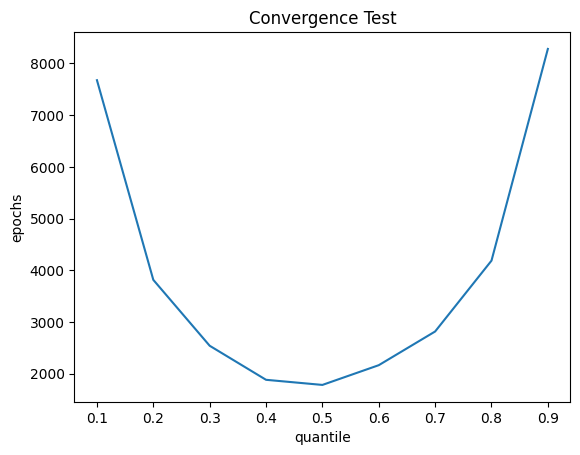

In [ ]:
import matplotlib.pyplot as plt


# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(quantile_list, epoch_list)

# Add labels and title
ax.set_xlabel('quantile')
ax.set_ylabel('epochs')
ax.set_title('Convergence Test')

# Display the plot
plt.show()

In [ ]:
def mse_loss(actual_values, predicted_values):
    # Calculate squared differences
    squared_diff = (actual_values - predicted_values) ** 2

    # Calculate mean squared error
    mse = torch.mean(squared_diff)

    return mse

---

In [ ]:
# Setting seed for reproducibility
torch.manual_seed(42)

# Initialising Parameters and Variables
x = torch.rand((2, 4), requires_grad=False)
y = torch.rand((2, 2), requires_grad=False)

# Weights and Biases connecting input and hidden layer
a0 = torch.rand((4, 5), requires_grad=True)
b0 = torch.rand((1, 5), requires_grad=True)

# Weights and Biases connecting hidden and output layer
a1 = torch.rand((5, 2), requires_grad=True)
b1 = torch.rand((1, 2), requires_grad=True)

loss = math.inf
epochs = 0
y_predt = torch.zeros((2, 2))

while not torch.allclose(y, y_predt, atol=1e-1):
  # Forward Propagation
  y_t = x@a0 + b0
  y_predt = y_t@a1 + b1

  # Computation of loss
  loss = mse_loss(y_predt, y)
  # print(loss.item())

  # Back Propagation
  loss.backward()

  # Gradient update
  with torch.no_grad():
      a0 = a0 - 0.01*a0.grad
      b0 = b0 - 0.01*b0.grad
      a1 = a1 - 0.01*a1.grad
      b1 = b1 - 0.01*b1.grad

  # Setting requires_grad to True again as it was modified
  a0.requires_grad = True
  a1.requires_grad = True
  b0.requires_grad = True
  b1.requires_grad = True

  epochs += 1

epoch_list.append(epochs)
print("Number of epochs taken to converge: ", epochs)
print()

Number of epochs taken to converge:  2015

